# MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado (en el proceso de hiperparametrización)

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Usuarios/Alfredo/DS4B/Python DS Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/07_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [8]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Voy a usar solamente regresion logistica, dado que es sabido que anda bien para lead scoring

Modificar los parámetros.

In [34]:
# el RandomForestClassifier() es solamente para abrir el Pipeline (con Pipeline tengo que poner 
# una tupla con el nombre le quieras poner y como segundo elemento la instancia del objeto)
pipe = Pipeline([('algoritmo',RandomForestClassifier())]) 

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar. Voy a usar grid search porque son pocos parametros 

####  Con grid search

In [35]:
grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = 'roc_auc',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,0.09,0.02,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.01,1
7,0.10,0.01,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.01,2
19,0.06,0.01,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.01,3
11,0.09,0.01,0.00,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.01,4
17,0.10,0.02,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.00,5
13,0.10,0.01,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.00,6
9,0.10,0.01,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.85,0.85,0.86,0.86,0.00,7
18,0.06,0.01,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",1,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.86,0.00,8
5,0.09,0.00,0.01,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.85,0.85,0.86,0.85,0.00,9
14,0.06,0.00,0.00,0.00,"LogisticRegression(C=0.75, n_jobs=-1, penalty=...",0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(C=0.75, n_job...",0.86,0.85,0.86,0.85,0.00,10


####  Con random search

In [11]:
#random_search = RandomizedSearchCV(estimator = pipe,
#                                   param_distributions = grid, 
#                                   n_iter = 5, 
#                                   cv = 3, 
#                                   scoring = 'roc_auc', 
#                                   verbose = 0,
#                                   n_jobs = -1)

#modelo = random_search.fit(train_x,train_y)

#pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

## EVALUAR

### Predecir sobre validación

In [36]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [37]:
roc_auc_score(val_y, pred)

0.8726588027453371

### Examinar el mejor modelo

In [38]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=0.75, n_jobs=-1, penalty='none',
                                    solver='saga'))])

Para ver cuales son las variables mas predictoras (coeficientes mas altos)

In [15]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 4.16381914,  8.18039792,  1.10591237,  1.45814164, -3.40759977,
         2.17996394,  1.47983154, -0.56567589, -1.40912983, -1.28858503,
        -0.8814185 , -0.85416441,  0.61772416,  0.07169642]])

In [16]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'score_perfil_mms',
       'paginas_vistas_visita_mms', 'visitas_total_mms',
       'ocupacion_Working Professional', 'ambito_Select',
       'ult_actividad_Converted to Lead',
       'ult_actividad_Chat Conversation',
       'ult_actividad_Page Visited on Website', 'ocupacion_Unemployed',
       'descarga_lm_No', 'ambito_Marketing Management'], dtype=object)

In [23]:
pd.DataFrame(data = abs(modelo.best_estimator_.named_steps.algoritmo.coef_),
            columns = modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).T

,0
tiempo_en_site_total_mms,4.16
score_actividad_mms,8.18
ult_actividad_SMS Sent,1.11
score_perfil_mms,1.46
paginas_vistas_visita_mms,3.41
visitas_total_mms,2.18
ocupacion_Working Professional,1.48
ambito_Select,0.57
ult_actividad_Converted to Lead,1.41
ult_actividad_Chat Conversation,1.29


## REPORTING DEL MODELO

### Gain Chart

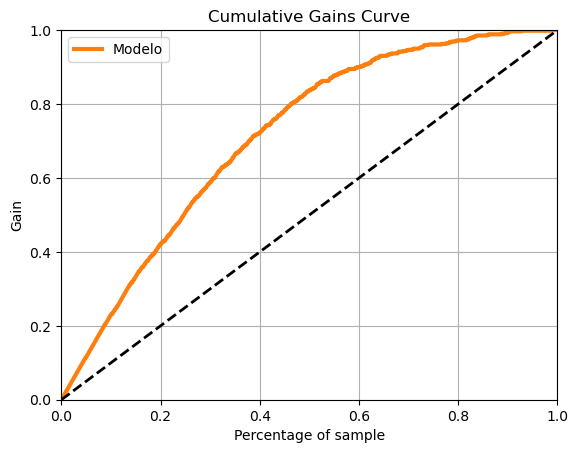

In [24]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

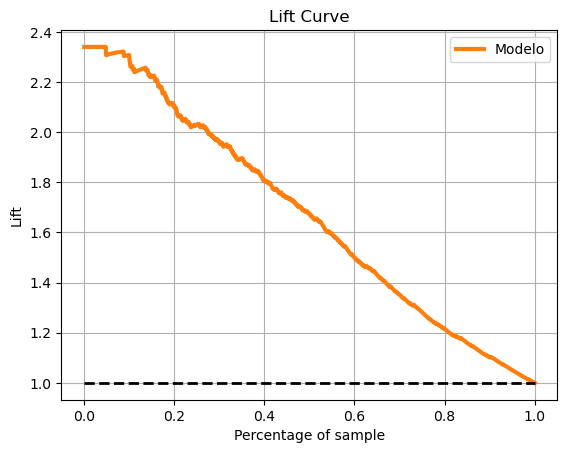

In [25]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

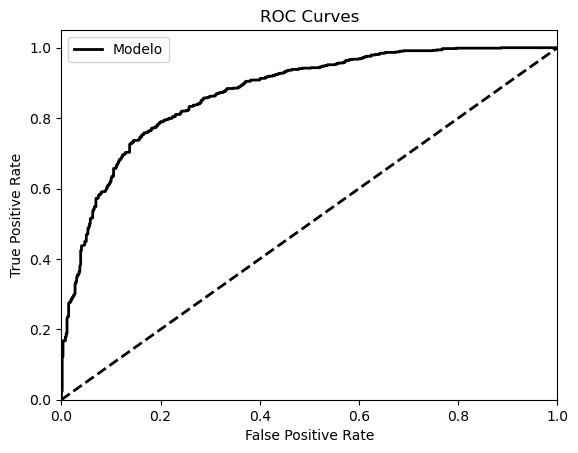

In [26]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();
